# **"An Athlete's Dream"** #
### An analysis of the last 120 years of Olympic trends.
by Quentin Bone

'120 years of Olympic history: athletes and results' is retrieved from **kaggle**. This data has 15 columns 271,116 describing athlete and country performance and statistics from 120 years of the Olympics beginning in 1896 in Athens and finishing in Rio in 2016. 

This notebook contains 7 sections: 
* Getting an Understanding of the Dataset
* Data Cleaning
* Exploratory Data Analysis
* Visualizations
* Insights and Generalizations
* Additional Insights and Generalizations
* Final Conclusions



### **Section 1: Getting an Understanding of the Dataset** ###

Before data cleaning begins, it is important to understand what the data contains and how it is organized. Getting an understanding of the dataset is the first step. The first step is finding column names, overall data info and what null/duplicate values the dataset contains. After that, the data can be cleaned, by either dropping null values or using means to fill in missing values. 

In [323]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('athlete_events.csv')

In [325]:
# Show first few rows
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [327]:
# Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [329]:
# Basic descriptive statistics for dataset
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [331]:
# View all columns and convert names to list
df.columns.tolist()

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [333]:
# Find and count null values  
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [335]:
# Finds and counts duplicate values
df.duplicated().sum()

1385

This intial analysis helped to understand of the shape, basic trends and cleanliness of the dataset. There are many duplicate values and many null values as well. Age has 9,474 null values while height and weight both have around 60,000 null values. The null values in the medal column can be ignored, as the null values mean that they didn't win a medal seeing as there are only three medals to give for each event.

#### **Section 2: Data Cleaning** ####

In this section the data will be cleaned. Cleaning data involves dropping any duplicates or nulls. First, a copy of the dataset should be created. This is so that the original data will not be affected by any dropped duplicates or null values. Columns with the wrong datatype will be changed in this section. To handle the null values for height and weight the median height and weight for males and females will be used to fill the nulls accordingly. For age, same method will be used.

In [340]:
# Create copy of dataset
df_clean = df.copy()

In [342]:
# Season column coverted to category Dtype
df_clean['Season'] = df_clean['Season'].astype('category')

In [344]:
# Fills missing Age, Height, Weight based on Sex group median
for column in ['Age', 'Height', 'Weight']:
    df_clean[column] = df_clean.groupby('Sex')[column].transform(lambda x: x.fillna(x.median()))

# Check to ensure nulls are filled
df_clean.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [346]:
# Find and drop duplicates based on athlete/event
df_clean = df_clean.drop_duplicates(subset=['Name', 'Games', 'Event'])

# Check to ensure duplicates are dropped
df_clean.duplicated().sum()

0

In [348]:
# Ensure the dataset is cleaned 
df_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [350]:
# Ensure the dataset is cleaned 
df_clean.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [352]:
# Ensure the dataset is cleaned 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269625 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      269625 non-null  int64   
 1   Name    269625 non-null  object  
 2   Sex     269625 non-null  object  
 3   Age     269625 non-null  float64 
 4   Height  269625 non-null  float64 
 5   Weight  269625 non-null  float64 
 6   Team    269625 non-null  object  
 7   NOC     269625 non-null  object  
 8   Games   269625 non-null  object  
 9   Year    269625 non-null  int64   
 10  Season  269625 non-null  category
 11  City    269625 non-null  object  
 12  Sport   269625 non-null  object  
 13  Event   269625 non-null  object  
 14  Medal   39740 non-null   object  
dtypes: category(1), float64(3), int64(2), object(9)
memory usage: 31.1+ MB


In this part of the project, I spent time getting to know the dataset and cleaning it so that it would be easier to work with later. I looked at things like missing values, wrong data types, and duplicate entries, and I made sure to fix all of them. I also added new columns like BMI and Age Group to help when doing more detailed analysis later on. After all of these steps, the dataset is now organized, consistent, and ready for deeper exploration.

### **Section 3: Exploratory Data Analysis** ###

In this section, the cleaned dataset: df_clean, is analyzed to explore trends. The data analysis will look at unique countries, athletes and sports. In addition, it will explore trends in participation by gender, year and sport, as well as which countries dominate in overall medals. Finally, it will explore the trends in athlete height, weight and age. 

In [357]:
# Unique athletes
unique_athletes = df_clean['Name'].nunique()
print(f"Number of unique athletes: {unique_athletes}")

# Unique countries
unique_countries = df_clean['Team'].nunique()
print(f"Number of unique countries/teams: {unique_countries}")

# Unique sports
unique_sports = df_clean['Sport'].nunique()
print(f"Number of unique sports: {unique_sports}")

Number of unique athletes: 134732
Number of unique countries/teams: 1175
Number of unique sports: 66


In [359]:
# Count all unique sports in the dataset
total_sports = df_clean['Sport'].nunique()

print(f"Total number of sports in the dataset: {total_sports}")

# List all unique sports in the dataset
all_sports_list = df_clean['Sport'].unique()

print(all_sports_list)


Total number of sports in the dataset: 66
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [361]:
# Number of unique athletes per sport
participants_per_sport = df_clean.groupby('Sport')['ID'].nunique().sort_values(ascending=False)

# Display top 10 sports with the most participants
print(participants_per_sport.head())

Sport
Athletics    22071
Swimming      8765
Rowing        7687
Football      6161
Cycling       5819
Name: ID, dtype: int64


In [363]:
# Participation by gender
gender_counts = df_clean['Sex'].value_counts()
print(gender_counts)

# Gender participation percentage
gender_percentage = df_clean['Sex'].value_counts(normalize=True) * 100
print(gender_percentage)

Sex
M    195256
F     74369
Name: count, dtype: int64
Sex
M    72.417617
F    27.582383
Name: proportion, dtype: float64


In [365]:
# Participation trend over years
participation_year = df_clean.groupby('Year')['ID'].nunique()

# Display a few results
print(participation_year.tail())

Year
2008    10899
2010     2536
2012    10516
2014     2745
2016    11179
Name: ID, dtype: int64


In [367]:
# Group by 'Team' (country) and count unique athletes (by 'ID')
country_participation = df_clean.groupby('Team')['ID'].nunique().sort_values(ascending=False)

# Display top 10 countries with the most athletes
print(country_participation.head(10))

Team
United States    9115
France           5784
Great Britain    5764
Italy            4698
Germany          4579
Canada           4547
Japan            4012
Australia        3768
Sweden           3618
Poland           2938
Name: ID, dtype: int64


In [369]:
# Filter only rows where a Medal was won
medals = df_clean[df_clean['Medal'].notnull()]

# Group by 'Team' and 'Medal' type, then count
country_medal_counts = medals.groupby(['Team', 'Medal']).size().unstack(fill_value=0)

# Display top 10 countries by total medals
country_medal_counts['Total'] = country_medal_counts.sum(axis=1)
country_medal_counts = country_medal_counts.sort_values('Total', ascending=False)

# Show top 10 countries
print(country_medal_counts.head(10))

Medal          Bronze  Gold  Silver  Total
Team                                      
United States    1233  2474    1512   5219
Soviet Union      677  1058     716   2451
Germany           678   679     627   1984
Great Britain     572   519     582   1673
France            577   455     518   1550
Italy             484   535     508   1527
Sweden            507   451     476   1434
Australia         511   342     453   1306
Canada            408   422     413   1243
Hungary           365   432     330   1127


In [371]:
# Summary statistics by gender
athlete_stats = df_clean.groupby('Sex')[['Age', 'Height', 'Weight']].describe()
athlete_stats

Age                                                       Height  \
        count       mean       std   min   25%   50%   75%   max     count   
Sex                                                                          
F     74369.0  23.693622  5.679261  11.0  20.0  23.0  27.0  74.0   74369.0   
M    195256.0  26.096484  6.059891  10.0  22.0  25.0  29.0  97.0  195256.0   

                 ...                  Weight                              \
           mean  ...    75%    max     count       mean        std   min   
Sex              ...                                                       
F    167.855047  ...  173.0  213.0   74369.0  59.916834   9.681463  25.0   
M    178.896505  ...  183.0  226.0  195256.0  75.263403  11.272322  28.0   

                              
      25%   50%   75%    max  
Sex                           
F    55.0  59.0  65.0  167.0  
M    70.0  74.0  80.0  214.0  

[2 rows x 24 columns]

In [373]:
# Create BMI = weight / (height in meters)^2
df_clean['BMI'] = df_clean['Weight'] / ( (df_clean['Height'] / 100) ** 2 )
df_clean.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20.761246
2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,23.095409


#### Conclusion ####

Here, I started to explore the cleaned dataset in order to gain a better understanding of what was in it. I looked at how many athletes, countries, and sports were contained, and I also looked at trends like how the involvement changed over time and how medals were split. This initial examination was used to draw attention to some of the main trends that are worth exploring in more detail in the future. In general, this section gave a good overall account of what the data is and what it could tell us in terms of stories.

One thing that was clearly notable to me when conducting this discovery was the extent to which the Olympics have grown over the years, more athletes and countries participating in more recent years compared to the original Games. I also observed that even though male athletes had dominated the majority of the contestants for quite a while, female participation has been steadily on the increase, especially over the last several decades. Another observation that stood out to me was that certain nations have continued to be overwhelmingly dominant in terms of winning medals, showing how political, historical, and economic factors might have influenced sporting success.


### **Section 4: Visualizations** ###

This section uses data visualizations to better explore trends in the dataset that were explored above. Important trends like most winning countries, gender participation over time, and others will be visualized in a way that is easy to understand using matplotlib.pyplot and seaborn. 

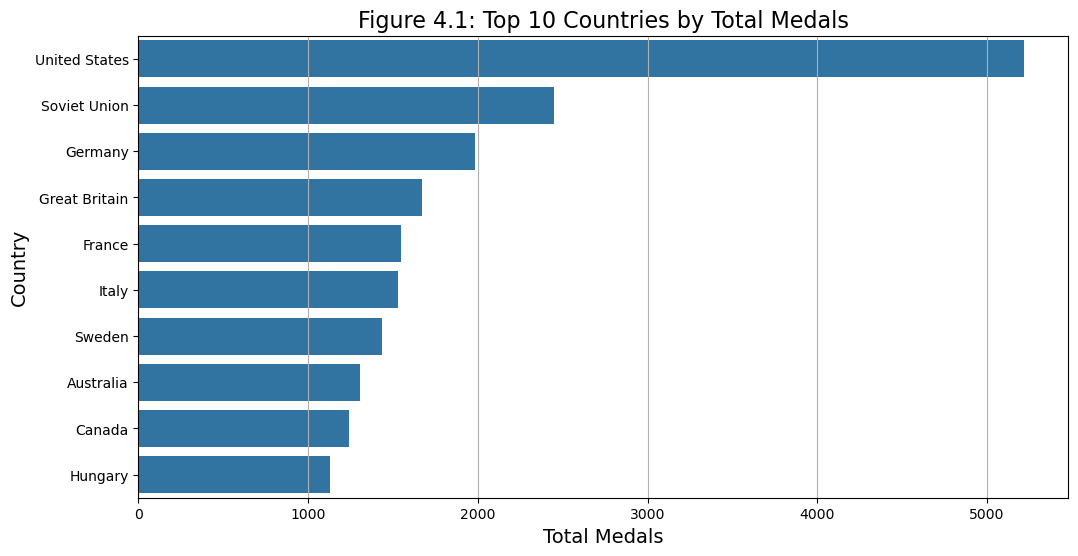

In [538]:
# Already prepared from earlier
top_10_countries = country_medal_counts.head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_countries['Total'], y=top_10_countries.index)

plt.title('Figure 4.1: Top 10 Countries by Total Medals', fontsize=16)
plt.xlabel('Total Medals', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(axis='x')
plt.savefig('figure41.png', dpi=300, bbox_inches='tight')
plt.show()


**Figure 4.1:** This chart shows the ten countries that have won the most total Olympic medals, gold, silver, and bronze. The United States is far ahead of all other countries by a very large margin. Countries like the Soviet Union and Germany also have very high medal counts, but they are still much behind the United States. This shows that some countries have had a good tradition of winning at the Olympics for many decades.

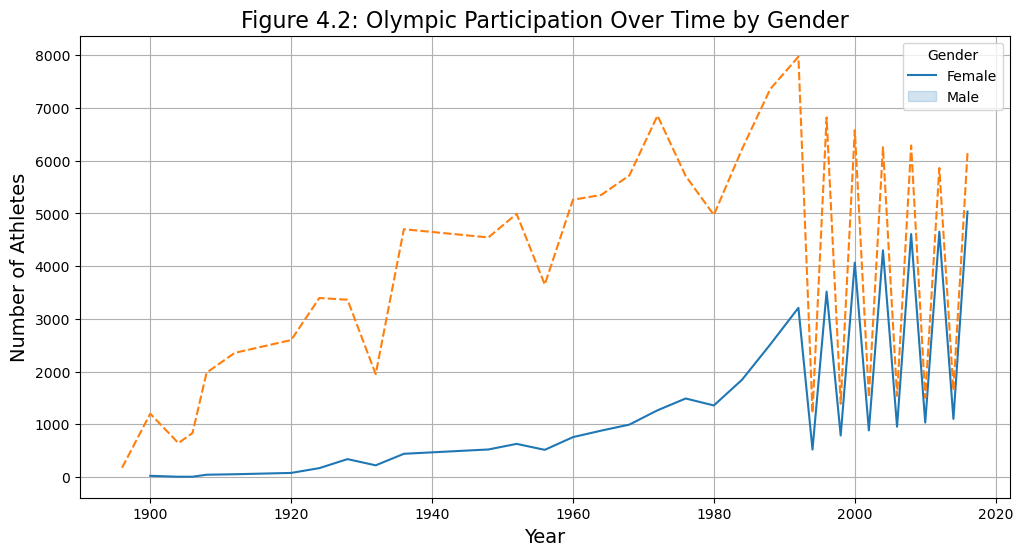

In [536]:
# Group by Year and Sex, count number of unique athletes
gender_participation = df_clean.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()

# Change the table to have separate Male and Female columns
gender_pivot = gender_participation.pivot(index='Year', columns='Sex', values='ID')

# Plot gender participation over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_pivot)

plt.title('Figure 4.2: Olympic Participation Over Time by Gender', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Athletes', fontsize=14)
plt.legend(['Female', 'Male'], title='Gender')
plt.grid(True)
plt.savefig('figure42.png', dpi=300, bbox_inches='tight')
plt.show()


**Figure 4.2:** This line graph shows how the number of female and male athletes has grown over the years at the Olympics. In the beginning, almost all the athletes were males, but since about the 1970s, the number of female athletes began growing extremely fast. In the latest years, female participation came close to male participation remarkably, showing that the Olympics have become much more inclusive for females. It also shows that profound changes in society did indeed have a real impact on sport over time.

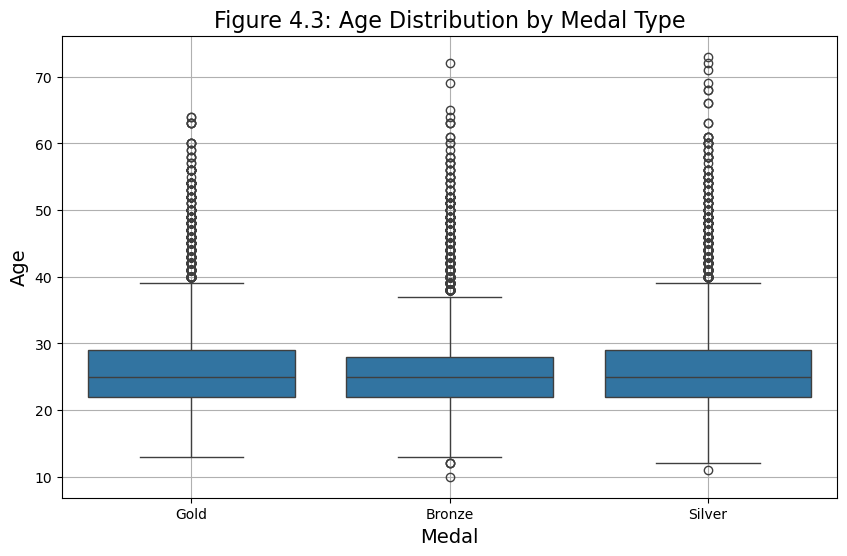

In [534]:
# Plot age distributions by Medal using seaborn
plt.figure(figsize=(10,6))
sns.boxplot(x='Medal', y='Age', data=df_clean)

plt.title('Figure 4.3: Age Distribution by Medal Type', fontsize=16)
plt.xlabel('Medal', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True)
plt.savefig('figure43.png', dpi=300, bbox_inches='tight')
plt.show()

**Figure 4.3:** This boxplot is utilized to compare the age of gold, silver, and bronze medalists. Most of the medalists are twenties or early thirties, but there are also some younger or older medalists. Gold medalists are slightly younger in average than silver and bronze winners. There are also a few outliers on the graph — some very young and very old medalists — but the great majority of athletes are in a pretty similar age range.

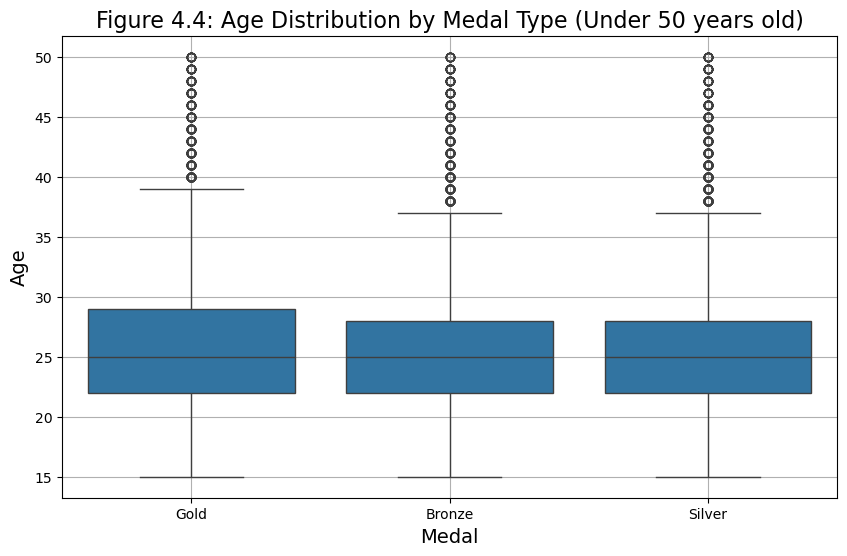

In [532]:
# Remove certain ages
df_filtered = df_clean[(df_clean['Age'] >= 15) & (df_clean['Age'] <= 50)]

# Create boxplot 
plt.figure(figsize=(10,6))
sns.boxplot(x='Medal', y='Age', data=df_filtered)

plt.title('Figure 4.4: Age Distribution by Medal Type (Under 50 years old)', fontsize=16)
plt.xlabel('Medal', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(True)
plt.savefig('figure44.png', dpi=300, bbox_inches='tight')
plt.show()

**Figure 4.4:** This graph is similar to the previous graph, but removes some of the outliers to take a closer look at the boxplots themselves.

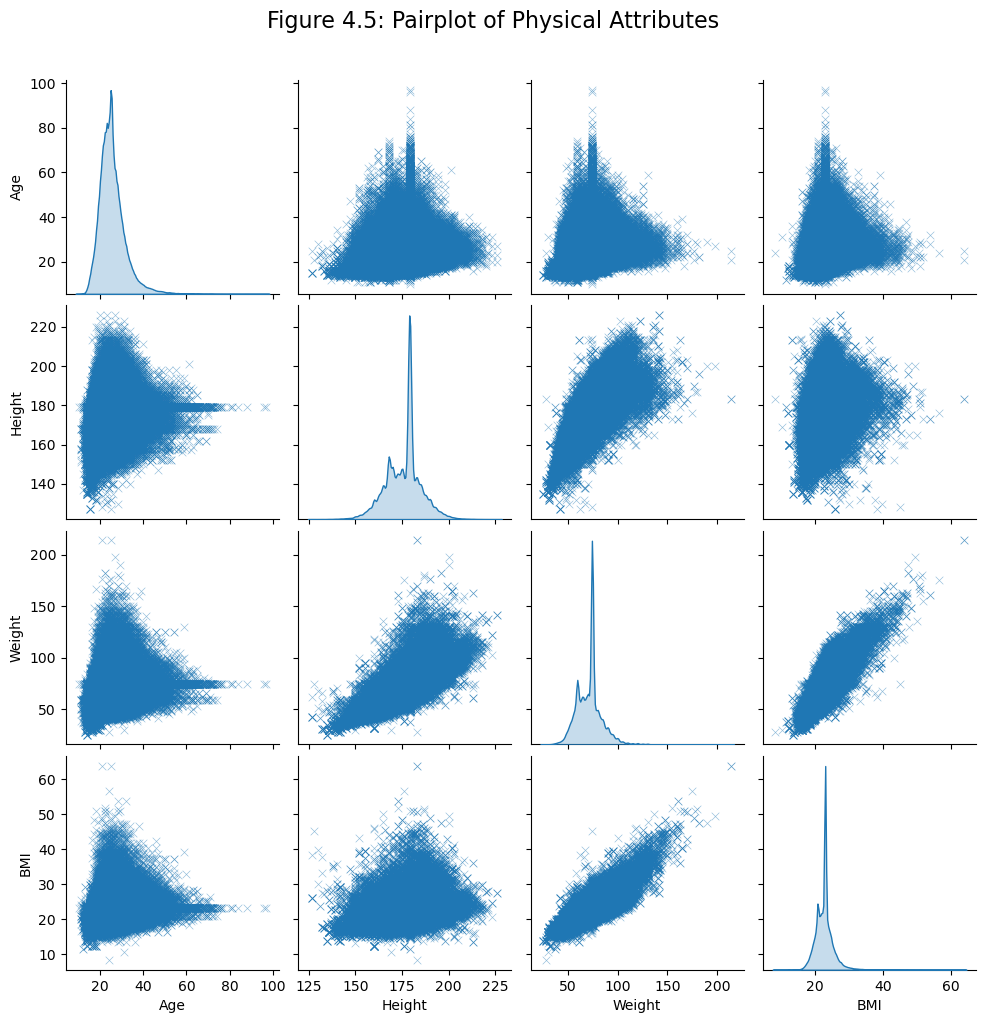

In [530]:
# Create pairplot for physical attributes 
sns.pairplot(df_clean[['Age', 'Height', 'Weight', 'BMI']].dropna(), 
             height=2.5,  # Adjust size for better visualization
             diag_kind='kde',  # Kernel Density Estimate makes better visualization
             markers='x',  # Use circles to represent points
             plot_kws={'alpha': 0.5, 's': 30}  # Adjust transparency and point size for better readability
            )

plt.suptitle('Figure 4.5: Pairplot of Physical Attributes', y=1.02, fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust the title spacing
plt.savefig('figure45.png', dpi=300, bbox_inches='tight')
plt.show()

**Figure 4.5:** This pairplot shows how different physical attributes like age, height, weight, and BMI are related to each other. As is clear from the graph, there is a clear positive relationship between weight and height, i.e., taller athletes weigh more. Weight and BMI are also closely related. Relations like age and height or age and BMI are not as strong, i.e., age is not a good predictor of how big an athlete is.

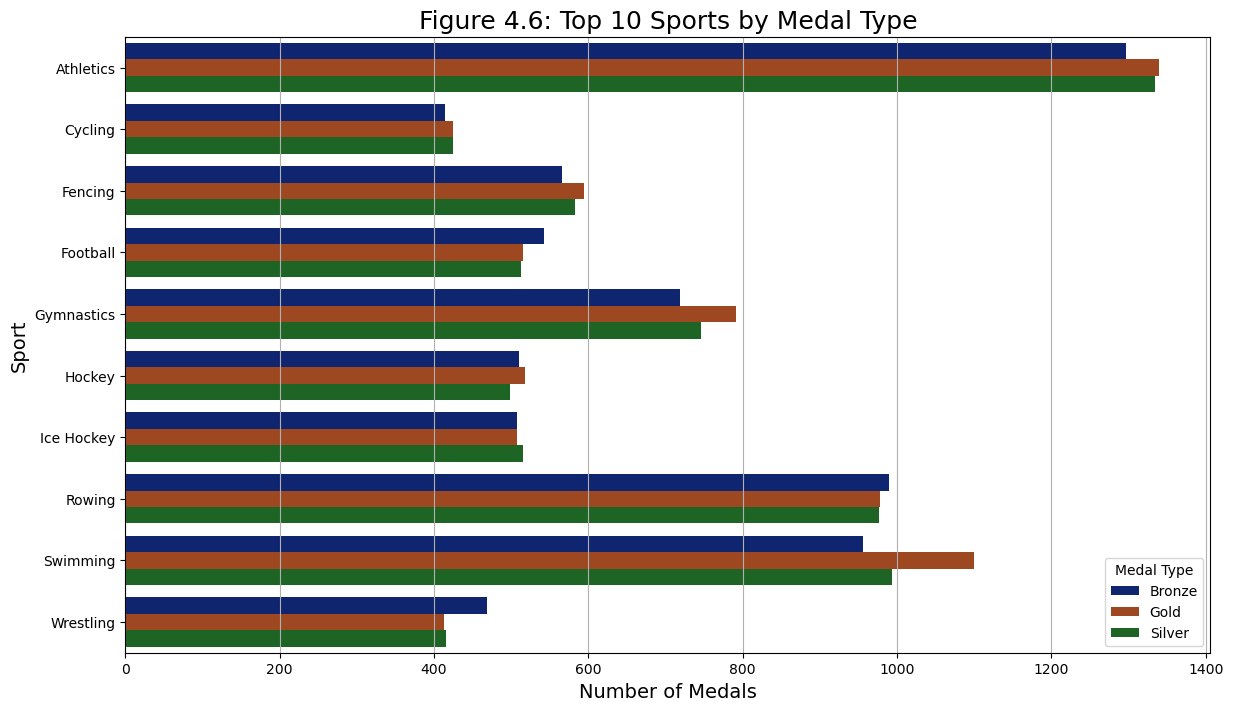

In [528]:
# Filter only medal winners
medal_sport = df_clean[df_clean['Medal'].notnull()]

# Group by Sport and Medal, count occurrences
sport_medal_counts = medal_sport.groupby(['Sport', 'Medal']).size().reset_index(name='Counts')

# Sort by total medals per sport
top_sports = medal_sport['Sport'].value_counts().head(10).index

# Filter only top 10 sports
sport_medal_counts_top = sport_medal_counts[sport_medal_counts['Sport'].isin(top_sports)]

# Plot with hue
plt.figure(figsize=(14,8))
sns.barplot(data=sport_medal_counts_top, 
            x='Counts', 
            y='Sport', 
            hue='Medal', 
            palette= 'dark')

plt.title('Figure 4.6: Top 10 Sports by Medal Type', fontsize=18)
plt.xlabel('Number of Medals', fontsize=14)
plt.ylabel('Sport', fontsize=14)
plt.legend(title='Medal Type')
plt.grid(axis='x')
plt.savefig('figure46.png', dpi=300, bbox_inches='tight')
plt.show()

**Figure 4.6:** This bar chart shows which sport has awarded the most medals in total, segregated by gold, silver, and bronze. There are most medals in athletics and swimming because these sports have so many various events and races. Other sports, like wrestling, gymnastics, and rowing, also account for a big number of medals. The chart is used to show that certain sports offer quite a bit more medal opportunities compared to others, giving nations more chances to succeed in some divisions.

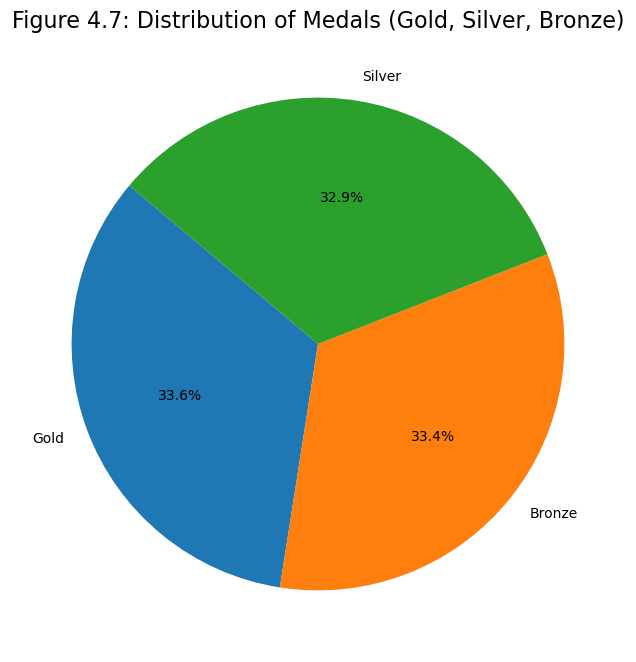

In [526]:
# Medal distribution
medal_distribution = df_clean['Medal'].value_counts()

# Plot
plt.figure(figsize=(8,8))
plt.pie(medal_distribution, labels=medal_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Figure 4.7: Distribution of Medals (Gold, Silver, Bronze)', fontsize=16)
plt.savefig('figure47.png', dpi=300, bbox_inches='tight')
plt.show()

**Figure 4.7:** This pie chart represents the overall percentage of gold, silver, and bronze medals that have been presented throughout Olympic history. The medals are distributed relatively evenly between gold, silver, and bronze and each represents approximately a third of the total. This makes sense because for the majority of events, three medals are awarded. The pie chart is used to show that there is not some large imbalance in the distribution of medals across all events.

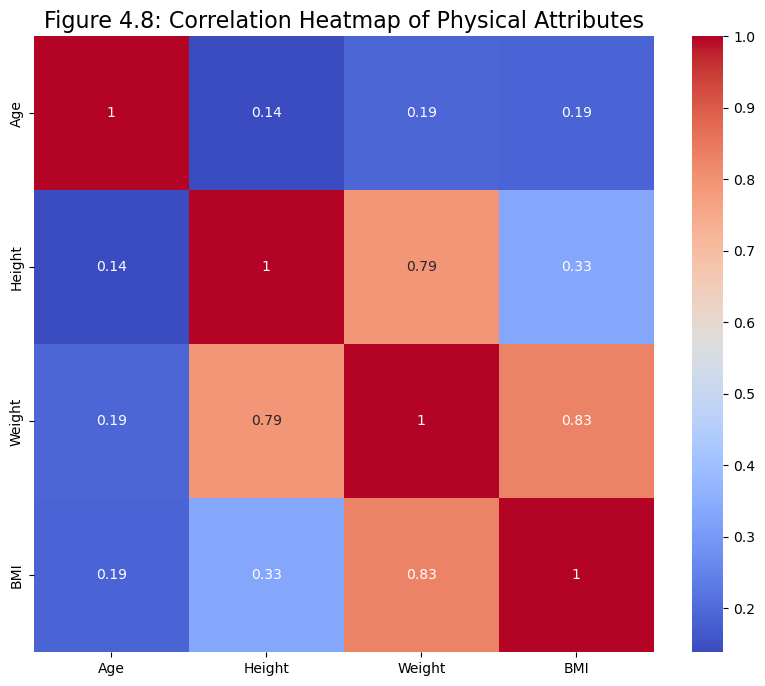

In [524]:
# Correlation heatmap of numeric attributes
plt.figure(figsize=(10,8))
sns.heatmap(df_clean[['Age', 'Height', 'Weight', 'BMI']].corr(), annot=True, cmap='coolwarm')

plt.title('Figure 4.8: Correlation Heatmap of Physical Attributes', fontsize=16)
plt.savefig('figure48.png', dpi=300, bbox_inches='tight')
plt.show()

**Figure 4.8:** This heatmap illustrates to what extent various physical attributes are correlated with one another. Height and weight are positively correlated and very strongly, meaning taller players are more likely to be heavier. BMI and weight are also well correlated. But age is not correlated with height, weight, or BMI very strongly, meaning an athlete's age does not predict his/her body size well. In general, the heatmap quickly identifies which traits are associated and which are not.

#### Conclusion ####

In this section, I made different kinds of plots and graphs to be able to see the trends in the data more easily. I investigated things like which countries and sports got the most medals, how male and female participation changed across the years, and how physical attributes like height and weight are related to one another. The graphs made important trends and observations of interest easier to discern than they were by merely looking at numbers. These visuals assist in demonstrating the greater narrative of how the Olympics have changed over time. One of the leading trends that appeared was the enormous growth in the participation of women, especially after the 1970s, which reveals that the Olympics have become much more inclusive over the decades. I also noticed that countries like the United States and the Soviet Union have dominated the



### **Section 5: Insights and Generalizations** ###


After exploring the dataset, creating visualization there are several important patterns that clear about the history and evolution of the Olympic Games. Some of the biggest trends and ideas from the project are listed below:

- **Growth in Participation:**  
  Over the decades, the total number of athletes competing in the Olympics has grown steadily. The Games have expanded to include many more countries, many more sports, and a much larger number of athletes than in the early years. This shows that the Olympics have become a  global event.

- **Increase in Female Athletes:**  
  One of the biggest changes was the rise in female participation, especially starting around the 1970s. Early on, the Olympics were almost entirely male, but over time, more and more women have joined. Some sports like Athletics, Swimming, and Gymnastics have very high female participation now, although there are still a few areas where men dominate.

- **Dominance of Certain Countries:**  
  Countries like the United States, the Soviet Union, and Germany have consistently won the most medals over time. This likely reflects how economic resources, government investment, and historical factors influenced success at the Olympics. 

- **Trends in Athlete Age:**  
  The analysis showed that gold medalists tend to be slightly younger than silver and bronze medalists. This suggests that reaching the very top of performance levels often happens at a younger age, especially in sports that require speed, endurance, or quick reactions.

- **Relationships Between Physical Traits:**  
  There was a strong positive relationship between height and weight, meaning that taller athletes usually weigh more. BMI was also closely connected to weight. However, age didn't have a strong relationship with physical size, showing that successful athletes come in many different shapes depending on the sport they compete in.

- **Data Limitations:**  
  Even though the dataset had some missing values and wasn’t always complete for every Olympic year, the major trends were still clear. Some periods and regions are underrepresented, but the big patterns about growth, gender inclusion, and athletic characteristics still stood out strongly.

- **Overall Evolution of the Olympics:**  
  Altogether, the Olympics have become much larger, more inclusive, and more competitive over time. The data shows that the Games have changed in important ways, reflecting broader changes happening around the world in terms of society, technology, and global participation.


### **Section 6: Additional Insights and Visualizations** ###

This section explores additional questions,insights, and visualizations. This section will use plotly.express as px to create interactive visualizations.
* Question 1: How has the number of athletes per decade changed over time?
* Question 2: Which sports have had the most female participation over time?
* Question 3: How has the average age of medalists changed over time?

In [485]:
import plotly.express as px

##### **Question 1** #####

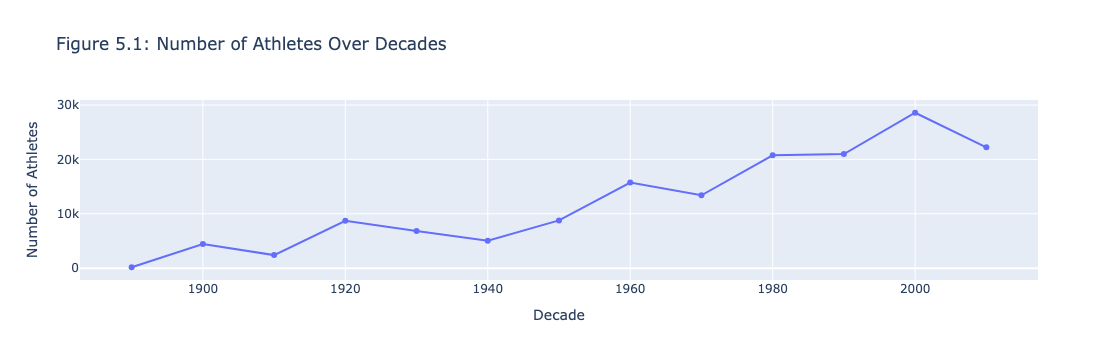

In [488]:
# Create a Decade column
df_clean['Decade'] = (df_clean['Year'] // 10) * 10

# Group by decade
athletes_per_decade = df_clean.groupby('Decade')['ID'].nunique().reset_index()

# Animated line plot
fig = px.line(athletes_per_decade, x='Decade', y='ID', markers=True,
            title='Figure 5.1: Number of Athletes Over Decades',
            labels={'ID': 'Number of Athletes', 'Decade': 'Decade'})

fig.update_traces(mode="markers+lines")
fig.show()

**Figure 5.1:** This animated line plot shows how the number of athletes has increased per decade. The Olympics have seen steady growth throughout the years, especially after World War II and again after the 1980s, reflecting how the Games expanded globally.


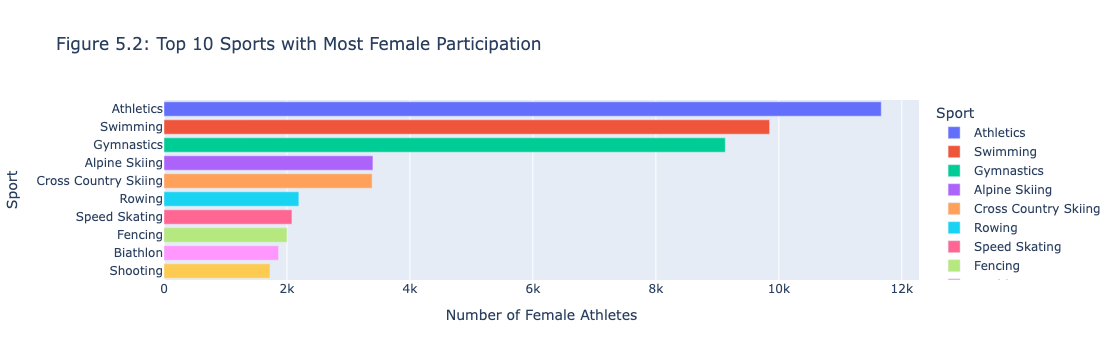

In [491]:
# Filter for female athletes
female_athletes = df_clean[df_clean['Sex'] == 'F']

# Group by Sport
female_participation = female_athletes['Sport'].value_counts().reset_index()
female_participation.columns = ['Sport', 'Number of Female Athletes']

# Interactive bar plot
fig = px.bar(female_participation.head(10), 
             x='Number of Female Athletes', 
             y='Sport', 
             orientation='h',
             title='Figure 5.2: Top 10 Sports with Most Female Participation',
             color='Sport')

fig.show()

**Figure 5.2:**
This interactive bar plot shows the top 10 sports with the highest number of female athletes. Athletics, Swimming, and Gymnastics are among the leading sports where women have been highly active, reflecting changes in opportunities and popularity over time.


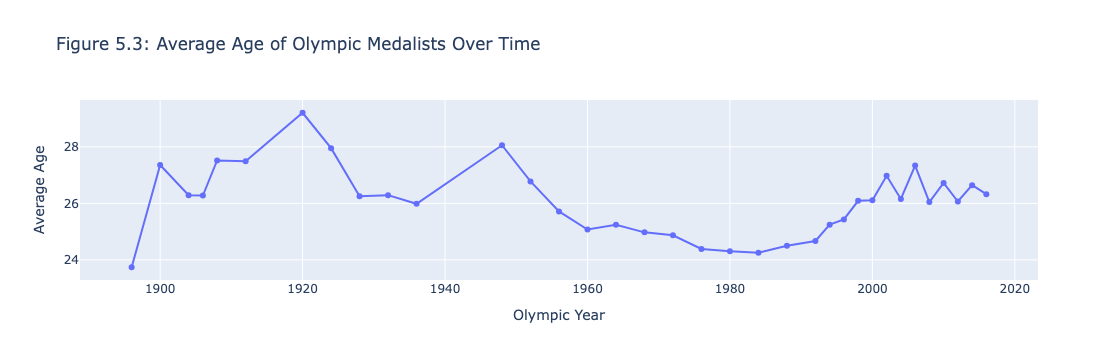

In [494]:
# Filter for medalists only
medalists = df_clean[df_clean['Medal'].notnull()]

# Group by Year and find average age
avg_age_per_year = medalists.groupby('Year')['Age'].mean().reset_index()

# Trend line plot
fig = px.line(avg_age_per_year, 
              x='Year', 
              y='Age',
              title='Figure 5.3: Average Age of Olympic Medalists Over Time',
              labels={'Age': 'Average Age', 'Year': 'Olympic Year'})

fig.update_traces(mode="markers+lines")
fig.show()

**Figure 5.3:** 
This trend line shows how the average age of the Olympic medalists has changed over the years. While there are fluctuations, the general trend is that athletes have continued to be in their early-to-mid twenties, with minor distinctions depending on the era and sport specialization.


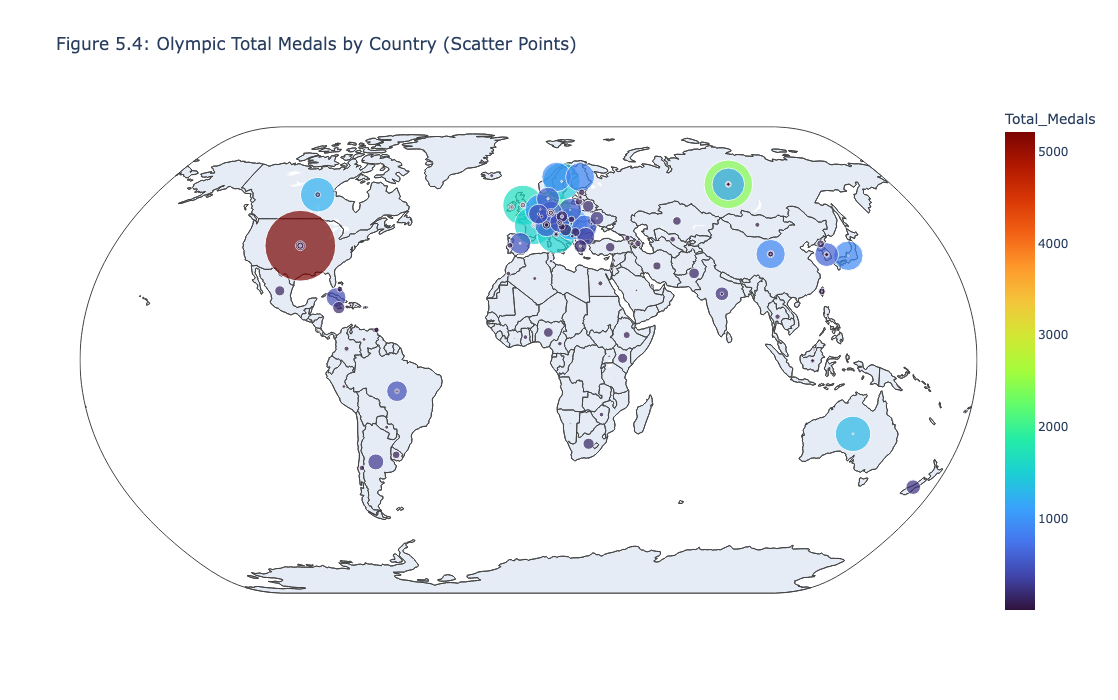

In [497]:
fig = px.scatter_geo(medals_by_country,
                     locations="Country", 
                     locationmode="country names",
                     size="Total_Medals",  
                     color="Total_Medals",  
                     color_continuous_scale="Turbo",
                     projection="natural earth",
                     size_max=50,
                     title="Figure 5.4: Olympic Total Medals by Country (Scatter Points)")

fig.update_layout(width=1200, height=700)
fig.update_geos(showcoastlines=True,
                showland=True,
                showcountries=True
               )
fig.show()

**Figure 5.4:** This map uses dots placed on each country to represent the total count of Olympic medals won. The size of each bubble corresponds to the amount of medals that country has won, with larger bubbles representing higher numbers. A custom range of sizes was applied so that even countries with only a few medals still appear on the map with a visible bubble, which helps to highlight their presence without being completely overshadowed by the frontrunner nations. Bubble color also indicates medal count, allowing for a nice visual differentiation between countries with fewer and more awards. Country borders, land and sea colors were added to increase the map's readability and visual balance.

### Conclusion

The additional questions and plots also helped further extend the analysis and show even more trends in the Olympic dataset. Using  animated and interactive plots, participation was easier to understand like how it has grown throughout the decades, how women have participated more and more across sports, and how attributes of athletes like age have evolved with time. These extra visualizations enabled further in-depth engagement with the data and the capability to see changes that might easily have been overlooked otherwise. Overall, this section proved that there are still so many more things to be learned from the dataset, and other types of visualizations can deliver patterns that may be lost through regular static graphs.


### **Section 7: Final Conclusion** ###

This project enabled a better appreciation of how the Olympics have grown and evolved over the past 120 years. By going through the process of cleaning the dataset thoroughly, exploring major trends, creating informative visualizations, and answering additional questions, it was clear that the Games have evolved in ways that reflect broader changes in society. Participation has increased exponentially, with more nations and more competitors than ever taking part; women are now a far larger component of the Olympics after decades of gradual growth. The statistics also showed how some nations have consistently dominated; and how, on occasion, physical traits can be attributed to success. Even though the dataset had some limitations, like missing data for early years, overall trends were still very clear and significant.

Working through the project step-by-step made it evident how many different factors get intertwined to shape global events like the Olympics. Overall, this analysis showed that the Olympic Games are more than just a sporting event, but an event about history, culture, growth, and transformation of the world. There are definitely many more questions that can be further explored in the future, but this project was an excellent starting point for obtaining the bigger picture. 